In [1]:
import pandas as pd
import ast

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data loading
df= pd.read_csv('data_jobs.csv')
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",16/06/2023 13:44,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,14/01/2023 13:18,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,10/10/2023 13:14,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",04/07/2023 13:01,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,07/08/2023 14:29,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## 1.EDA on Data Analyst Jobs in UK

In [4]:
#Data Cleaning
df['job_posted_date'] =pd.to_datetime(df['job_posted_date'], dayfirst=True)

df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [5]:
##Filter for UK Data Analyst Roles
df_da_uk = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United Kingdom')].copy()

### Perform EDA on the filtered Dataset
1. Data Analysts in each location
2. Pie chart of work from home, degree requirement, health insurance provided
3. Company names and the percentage of Data Analysts

In [6]:
#location bar graph
##remove redundant locations such as United Kingdom and Anywhere
not_list =['United Kingdom']
df_location_uk = df_da_uk[~df_da_uk['job_location'].isin(not_list)]

In [7]:
df_plot = df_location_uk['job_location'].value_counts(ascending =False).head(10)
df_plot

job_location
Anywhere                   959
England, UK                610
Manchester, UK             595
Birmingham, UK             440
Leeds, UK                  416
Edinburgh, UK              319
London, UK                 315
Glasgow, UK                225
Newcastle upon Tyne, UK    194
Nottingham, UK             182
Name: count, dtype: int64

In [8]:
df_plot = pd.DataFrame(df_plot)
df_plot = df_plot.reset_index()

In [9]:
df_plot

,job_location,count
0,Anywhere,959
1,"England, UK",610
2,"Manchester, UK",595
3,"Birmingham, UK",440
4,"Leeds, UK",416
5,"Edinburgh, UK",319
6,"London, UK",315
7,"Glasgow, UK",225
8,"Newcastle upon Tyne, UK",194
9,"Nottingham, UK",182


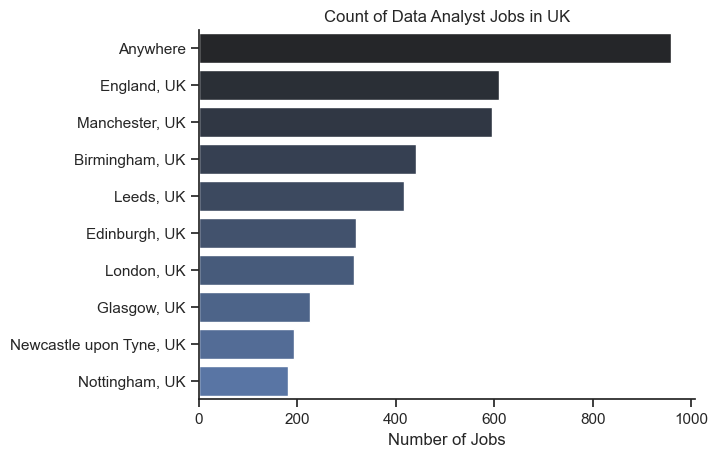

In [10]:
sns.set_theme(style="ticks")
bar_plot = sns.barplot(data =df_plot,x='count', y='job_location', hue='count', dodge=False, palette='dark:b_r')
bar_plot.legend().remove()
sns.despine()# to remove the boarder around graph
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Count of Data Analyst Jobs in UK')
plt.show()

In [11]:
#Pie Chart
df_da_uk['job_health_insurance'].value_counts().sort_index()

job_health_insurance
False    10481
True         1
Name: count, dtype: int64

In [12]:
df_da_uk['job_work_from_home'].value_counts().sort_index()

job_work_from_home
False    9523
True      959
Name: count, dtype: int64

In [13]:
df_da_uk['job_no_degree_mention'].value_counts().sort_index()
##Sorting to make sure that first value is False next comes True, because lables are initiallized manually

job_no_degree_mention
False    3039
True     7443
Name: count, dtype: int64

In [14]:
plots_dict ={'job_work_from_home':'Work From Home'
             ,'job_no_degree_mention':'Degree Requirment'
             ,'job_health_insurance':'Health Insurance Provided'}

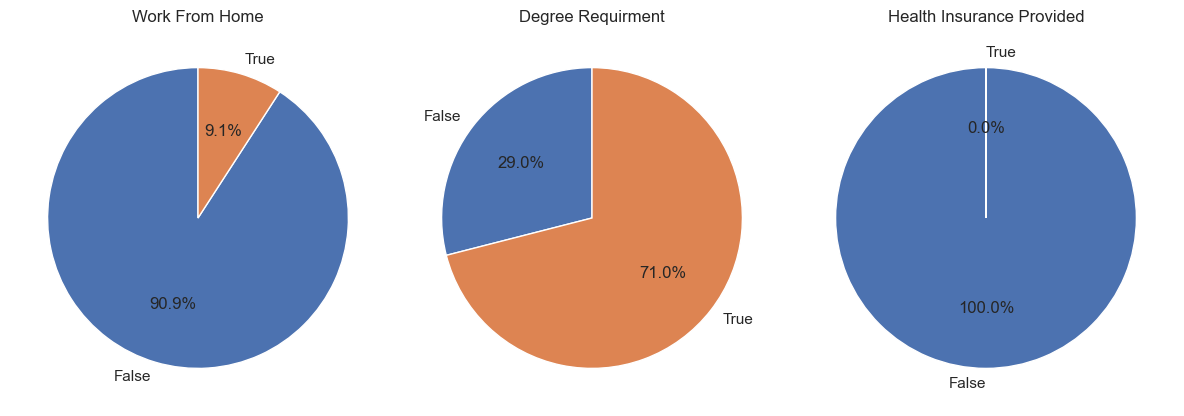

In [15]:

fig , ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (col,name) in enumerate(plots_dict.items()):
    ax[i].pie(df_da_uk[col].value_counts().sort_index(), labels =['False', 'True'], autopct ='%.1f%%',startangle =90)
    ax[i].set_ylabel('')
    ax[i].set_title(name)
    
plt.tight_layout()

In [16]:
##Bar chart company name and number of data analysts
df_company = df_da_uk['company_name'].value_counts().sort_values(ascending =False).head(10).to_frame()

In [17]:
df_company =df_company.reset_index()

In [18]:
df_company

,company_name,count
0,Jobleads-UK,171
1,ClickJobs.io,155
2,Baltic Training Services Limited,134
3,Harnham,115
4,In Technology Group,65
5,Nigel Frank International,65
6,Baltic Training Services,64
7,RemoteWorker UK,63
8,CareerAddict,59
9,Lloyds Banking Group,51


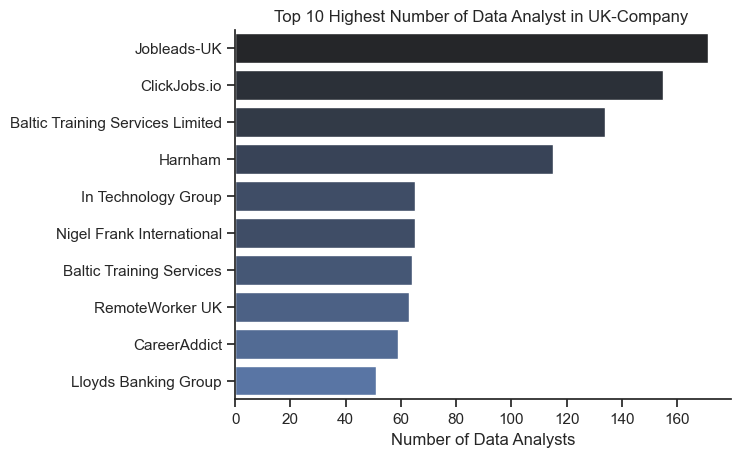

In [19]:
bar_plot = sns.barplot(data =df_company,x='count', y='company_name', hue='count', dodge=False, palette='dark:b_r')
sns.despine()
bar_plot.legend().remove()
plt.xlabel('Number of Data Analysts')
plt.ylabel('')
plt.title('Top 10 Highest Number of Data Analyst in UK-Company ')
plt.show()

## 2.Job Skills Required 

In [27]:
df_uk = df[df['job_country']=='United Kingdom'].copy()

In [28]:
df_uk = df_uk.explode('job_skills')

#### Calculate the likelihood of a skill to appear in job posting, create a bar graph and show in the form of percentages

In [41]:
##use group by
df_skill_count = df_uk.groupby(['job_title_short','job_skills'])['job_skills'].size().sort_values(ascending=False)

In [43]:
df_skill_count= df_skill_count.reset_index(name ='skill_count') 

In [44]:
df_skill_count

,job_title_short,job_skills,skill_count
0,Data Engineer,sql,7050
1,Data Engineer,python,6462
2,Data Scientist,python,6329
3,Data Engineer,azure,4865
4,Data Analyst,sql,4467
...,...,...,...
1414,Machine Learning Engineer,aurora,1
1415,Data Scientist,wsl,1
1416,Business Analyst,airtable,1
1417,Data Scientist,react.js,1


In [61]:
df_skill_count[df_skill_count['job_title_short']=='Data Analyst'].head(5)

,job_title_short,job_skills,skill_count
4,Data Analyst,sql,4467
5,Data Analyst,excel,4274
8,Data Analyst,power bi,2853
11,Data Analyst,python,2118
17,Data Analyst,tableau,1637


In [62]:
job_list =df_skill_count['job_title_short'].unique()[:3].tolist()
job_list = sorted(job_list)

In [63]:
job_list

['Data Analyst', 'Data Engineer', 'Data Scientist']

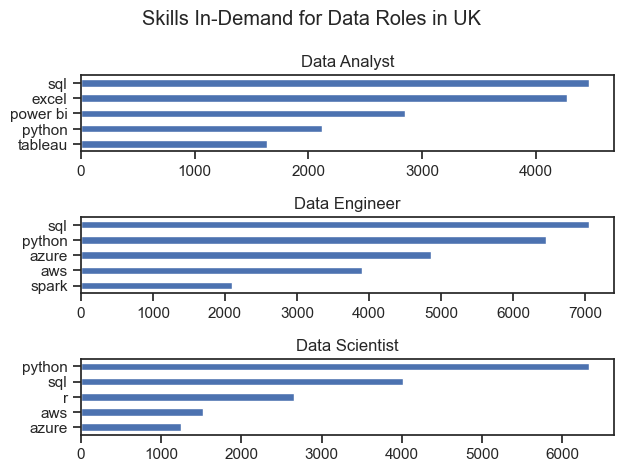

In [112]:
fig, ax = plt.subplots(len(job_list),1)
for i ,job in enumerate(job_list):
    df_plot = df_skill_count[df_skill_count['job_title_short']==job].head(5)
    df_plot.plot(kind='barh', y='skill_count', x='job_skills', ax=ax[i], title=job, legend=False)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    
fig.suptitle('Skills In-Demand for Data Roles in UK')
plt.tight_layout()
    
    

###### We want to display the percentages of skill requirement..
###### Use the following formula
###### % of skill count = (skill count in job posting / number of job posting)*100

In [96]:
df_total_jobs = df_uk['job_title_short'].value_counts()

In [97]:
df_total_jobs= df_total_jobs.reset_index(name='total_jobs')

In [98]:
##total number of job postings 
df_total_jobs

,job_title_short,total_jobs
0,Data Engineer,59257
1,Data Scientist,36821
2,Data Analyst,29825
3,Senior Data Engineer,19369
4,Senior Data Scientist,10177
5,Senior Data Analyst,4942
6,Software Engineer,2523
7,Business Analyst,2436
8,Machine Learning Engineer,1431
9,Cloud Engineer,765


In [103]:
#merge this table and the df_skills_count
df_skill_count= df_skill_count.merge(df_total_jobs, how='left', on='job_title_short')

In [104]:
df_skill_count

,job_title_short,job_skills,skill_count,total_jobs
0,Data Engineer,sql,7050,59257
1,Data Engineer,python,6462,59257
2,Data Scientist,python,6329,36821
3,Data Engineer,azure,4865,59257
4,Data Analyst,sql,4467,29825
...,...,...,...,...
1414,Machine Learning Engineer,aurora,1,1431
1415,Data Scientist,wsl,1,36821
1416,Business Analyst,airtable,1,2436
1417,Data Scientist,react.js,1,36821


In [107]:
df_skill_count['skill_percent'] = (df_skill_count['skill_count']/df_skill_count['total_jobs']) *100

In [109]:
df_skill_count.sort_values(by='skill_percent', ascending=False)

,job_title_short,job_skills,skill_count,total_jobs,skill_percent
2,Data Scientist,python,6329,36821,17.188561
15,Senior Data Scientist,python,1737,10177,17.067898
87,Business Analyst,sql,384,2436,15.763547
40,Senior Data Analyst,sql,766,4942,15.499798
141,Machine Learning Engineer,python,216,1431,15.094340
...,...,...,...,...,...
1393,Data Engineer,npm,1,59257,0.001688
1394,Data Engineer,mxnet,1,59257,0.001688
1395,Data Engineer,laravel,1,59257,0.001688
1396,Data Engineer,haskell,1,59257,0.001688


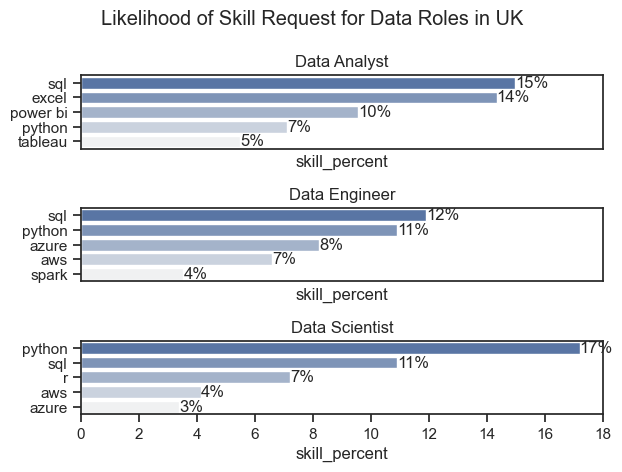

In [126]:
fig, ax = plt.subplots(len(job_list),1)
for i ,job in enumerate(job_list):
    df_plot = df_skill_count[df_skill_count['job_title_short']==job].head(5)
    sns.barplot(data =df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', dodge=False, palette='light:b')
    ax[i].legend().remove()
    ax[i].set_ylabel('')
    #ax[i].invert_yaxis() - not required when using sns
    ax[i].set_xlim(0,18)
    ax[i].set_title(job)
    
    for n,v in enumerate(df_plot['skill_percent']):# v is the actual percentage, n is the index
        ax[i].text(v,n,f'{v:.0f}%', va='center')# text is taking the x and y cordinates in the first 2 params and actual value to be printed in the third param
    
    #removing the x-axis for first two plots because it is redundant
    if i !=len(job_list)-1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Skill Request for Data Roles in UK')
plt.tight_layout()

## 3.Skills Trend

In [131]:
df_uk['job_posted_month_no']= df_uk['job_posted_date'].dt.month

In [132]:
df_uk['job_posted_month']= df_uk['job_posted_date'].dt.strftime('%b')

In [186]:
top5_skills = df_uk['job_skills'].value_counts(ascending=False).head(5)
top5_skills = top5_skills.index.tolist()

In [207]:
top5_skills = sorted(top5_skills)
top5_skills

['aws', 'azure', 'excel', 'python', 'sql']

In [187]:
df_uk_skills = df_uk[df_uk['job_skills'].isin(top5_skills)].copy()

In [188]:
df_skill_trend = df_uk_skills.groupby(['job_posted_month','job_posted_month_no','job_skills'])['job_skills'].size()

In [189]:
#First sort by top 5 skills 
df_skill_trend

job_posted_month  job_posted_month_no  job_skills
Apr               4                    aws            425
                                       azure          435
                                       excel          309
                                       python        1031
                                       sql            995
Aug               8                    aws            560
                                       azure          621
                                       excel          401
                                       python        1470
                                       sql           1419
Dec               12                   aws            666
                                       azure          743
                                       excel          501
                                       python        1684
                                       sql           1554
Feb               2                    aws            712
                      

In [190]:
df_skill_trend = df_skill_trend.reset_index(name='skill_count')

In [191]:
df_skill_trend = df_skill_trend.sort_values('job_posted_month_no')
df_skill_trend

,job_posted_month,job_posted_month_no,job_skills,skill_count
24,Jan,1,sql,2450
23,Jan,1,python,2277
22,Jan,1,excel,812
21,Jan,1,azure,972
20,Jan,1,aws,840
19,Feb,2,sql,1853
18,Feb,2,python,1700
17,Feb,2,excel,636
16,Feb,2,azure,808
15,Feb,2,aws,712


In [196]:
df_skill_trend_pvt = df_skill_trend.pivot_table(columns='job_skills', index =['job_posted_month','job_posted_month_no'], values ='skill_count')


In [201]:
df_skill_trend_pvt= df_skill_trend_pvt.reset_index()
df_skill_trend_pvt = df_skill_trend_pvt.sort_values('job_posted_month_no')
df_skill_trend_pvt

job_skills,job_posted_month,job_posted_month_no,aws,azure,excel,python,sql
4,Jan,1,840,972,812,2277,2450
3,Feb,2,712,808,636,1700,1853
7,Mar,3,569,623,458,1413,1393
0,Apr,4,425,435,309,1031,995
8,May,5,471,473,342,1127,1141
6,Jun,6,595,612,418,1455,1417
5,Jul,7,708,823,559,1663,1740
1,Aug,8,560,621,401,1470,1419
11,Sep,9,791,845,715,1937,2040
10,Oct,10,908,990,768,2192,2271


In [211]:
df_skill_trend_pvt.drop(columns=['job_posted_month_no'], inplace =True)

In [212]:
df_skill_trend_pvt = df_skill_trend_pvt.set_index('job_posted_month')
df_skill_trend_pvt

job_skills,aws,azure,excel,python,sql
job_posted_month,,,,,
Jan,840,972,812,2277,2450
Feb,712,808,636,1700,1853
Mar,569,623,458,1413,1393
Apr,425,435,309,1031,995
May,471,473,342,1127,1141
Jun,595,612,418,1455,1417
Jul,708,823,559,1663,1740
Aug,560,621,401,1470,1419
Sep,791,845,715,1937,2040


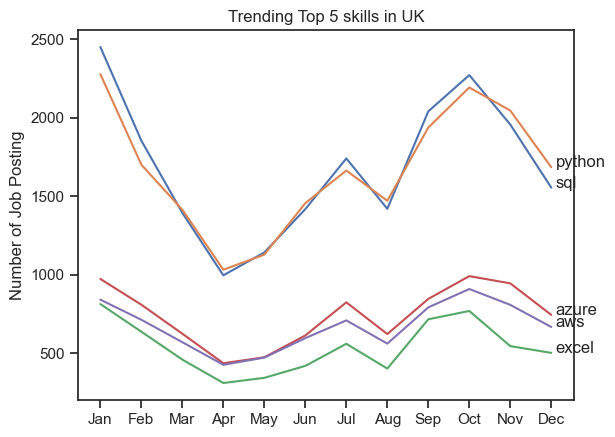

In [220]:
line_plot = sns.lineplot(data=df_skill_trend, x='job_posted_month', y='skill_count', hue='job_skills')
plt.title('Trending Top 5 skills in UK')
plt.xlabel('')
plt.ylabel('Number of Job Posting')
line_plot.legend().remove()
for i in range(5):
    plt.text(11.1, df_skill_trend_pvt.iloc[-1,i],top5_skills[i])# To print the skill name on graph instead of using legend, 
    #11 is the x cordinate since we have x divided in 12 parts (Months), the 2nd param is the december count value of a 
    #skill, this points to the end of the line, 3rd param is the text that needs to be printed, we have previously 
    #mentioned list of top5 skills required 
plt.show()

## 4.Salary Analysis

In [226]:
job_titles =['Data Analyst','Data Scientist','Data Engineer','Senior Data Scientist', 'Senior Data Analyst','Senior Data Engineer']
df_job_uk = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United Kingdom')].copy()
df_job_uk.dropna(subset=['salary_year_avg'], inplace =True)

In [233]:
df_job_uk['job_title_short'].value_counts()

job_title_short
Data Scientist           75
Data Analyst             72
Data Engineer            60
Senior Data Scientist    31
Senior Data Engineer     24
Senior Data Analyst       8
Name: count, dtype: int64

In [236]:
##Want to show them in desceding order
job_order = df_job_uk.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


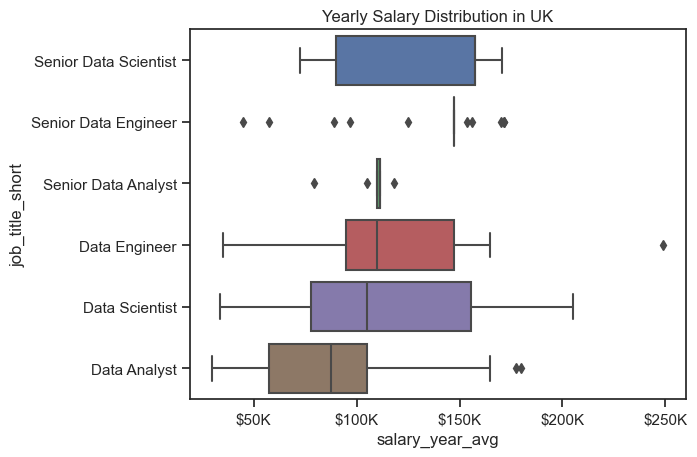

In [238]:
sns.boxplot(data =df_job_uk,x='salary_year_avg',y='job_title_short', order=job_order)
plt.title('Yearly Salary Distribution in UK')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.show()



## 5.Skills in Demand for Data Analyst

In [241]:
df_exploded =df.explode('job_skills')

In [243]:
df_da = df_exploded[df_exploded['job_title_short']=='Data Analyst']
df_da_salary_skills =df_da.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [244]:
skill_stats = df_da_salary_skills.sort_values('skill_count', ascending =False).head(20)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0000
excel,66860,84479.0000
python,57190,98500.0000
tableau,46455,95000.0000
power bi,39380,90000.0000
r,29996,92527.5000
sas,27998,90000.0000
powerpoint,13822,85000.0000
word,13562,80000.0000


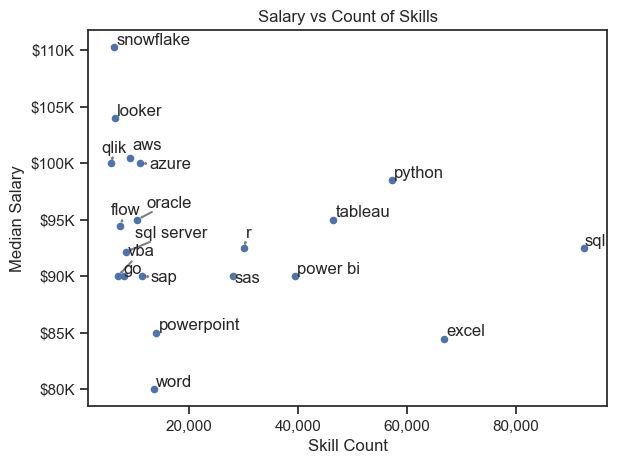

In [245]:
##Customized plot
from adjustText import adjust_text

texts=[]
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs Count of Skills')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle="->",color='gray', lw=1.5))

ax=plt.gca() # make sure this part comes after plotting your graph
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K')) # pos is the index value of the tick marks on y axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'{int(x):,}'))## adding the commas to the values in x axis
plt.show()

In [261]:
job_len = df[(df['job_title_short']=='Data Analyst') ]
job_count= len(job_len)

In [265]:
skill_stats['skill_percent']= (skill_stats['skill_count']/job_count)*100

In [268]:
high_demand = skill_stats.head(15)

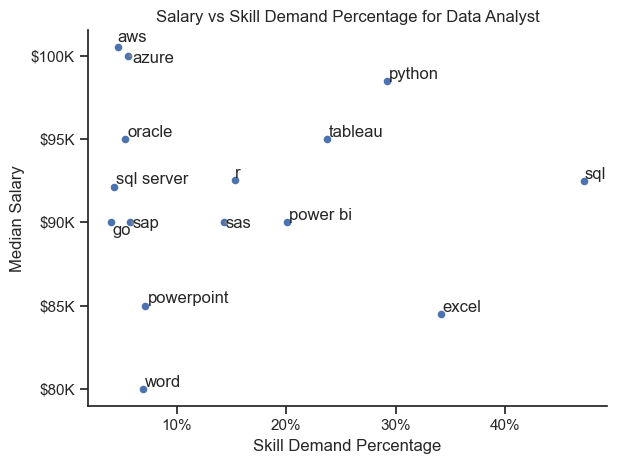

In [278]:
##Customized plot
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

texts=[]
high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.title('Salary vs Skill Demand Percentage for Data Analyst')
plt.xlabel('Skill Demand Percentage')
plt.ylabel('Median Salary')
plt.tight_layout()

for i,txt in enumerate(high_demand.index):
    texts.append(plt.text(high_demand['skill_percent'].iloc[i], high_demand['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle="->",color='gray', lw=1.5))


ax=plt.gca() # make sure this part comes after plotting your graph
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K')) # pos is the index value of the tick marks on y axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))## adding the commas to the values in x axis

sns.despine()

plt.show()